本方法使用SVD分解，也可以使用书中的协方差分解

因为要最大化方差，也可以使用梯度上升的方法来进行求解X1求出第一主成分，然后去掉第一主成分的值为X2，再使用梯度上升的方法来进行求解X2求出第一主成分，依次迭代下去

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def pca(X,K):
    u,s,vT = np.linalg.svd(X,full_matrices=0)
    return X.dot(vT.T[:, 0:K]),u,s,vT  # 选取前K大的值保留，其他省略掉

def recoverData(Z, v, K):
    V_reduce = v[:,0:K]
    X_rec = Z.dot(V_reduce.T)
    return X_rec

In [2]:
from sklearn import datasets

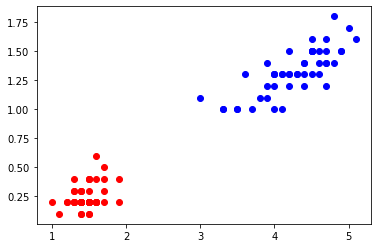

In [3]:
iris = datasets.load_iris()
iris = datasets.load_iris()

# 选取的维度为2维
iris_x = iris.data[:, 2:]
iris_y = iris.target
# 我们选取两个来做二分类的为题就好了
X = iris_x[iris_y<2]
Y = iris_y[iris_y < 2]
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='r')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='b')

In [4]:
Z,u,s,vT = pca(X,1)
X.shape

(100, 2)

In [6]:
print(u.shape)
print(s.shape)
print(vT.shape)

(100, 2)
(2,)
(2, 2)


In [8]:
vT

array([[-0.95854076, -0.28495546],
       [-0.28495546,  0.95854076]])

In [9]:
s

array([33.42173619,  1.71392826])

In [5]:
Z.shape   # 降到了一维

(100, 1)

In [6]:
X_rec = recoverData(Z,vT,1)

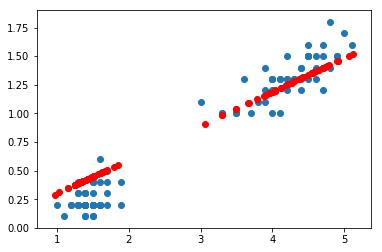

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_rec[:, 0], X_rec[:, 1],c='red')
plt.show()

END

实验一下波士顿房价

In [8]:
boston = datasets.load_boston()
X1 = boston.data
X1.shape

(506, 13)

In [14]:
# 我们降到8维
Z1,u1,s1,vT1 = pca(X1,8)
Z1.shape

(506, 8)

In [15]:
X_rec1 = recoverData(Z1,vT1,8)
X_rec1.shape

(506, 13)